In [270]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (10, 5)

In [349]:
df = pd.read_excel('data.xlsx')
df.pop('Unnamed: 5')

df = df.assign(month =  0)
for i in range(732):
    if i >= 0 and i <= 129:
        df.iloc[i, 7] = 5
    elif i >= 130 and i <= 257:
        df.iloc[i, 7] = 6
    elif i >= 259 and i <= 368:
        df.iloc[i, 7] = 7
    elif i >= 370 and i <= 483:
        df.iloc[i, 7] = 8
    elif i >= 485 and i <= 593:
        df.iloc[i, 7] = 9
    elif i >= 595 and i <= 729:
        df.iloc[i, 7] = 10
        
df = df.loc[df['client_id'].isna() == 0]
df = df.loc[df['receiving_date'] != '-']
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format="%Y-%m-%d %H:%M:%S")

df

,client_id,sum,status,sale,new/current,document,receiving_date,month
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,5
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,5
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,5
6,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,5
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,10
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,10
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,10
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,10


In [370]:
#1
summ = df.loc[(df['status'] != 'ПРОСРОЧЕНО') & 
       (df['month'] == 7), 'sum'].sum()
print('Общая выручка за июль 2021 по не просроченным сделкам = ' + str(summ))


Общая выручка за июль 2021 по не просроченным сделкам = 859896.4699999997


<AxesSubplot:title={'center':'Выручка за рассматриваемый период'}, xlabel='Месяц', ylabel='Выручка, руб.'>

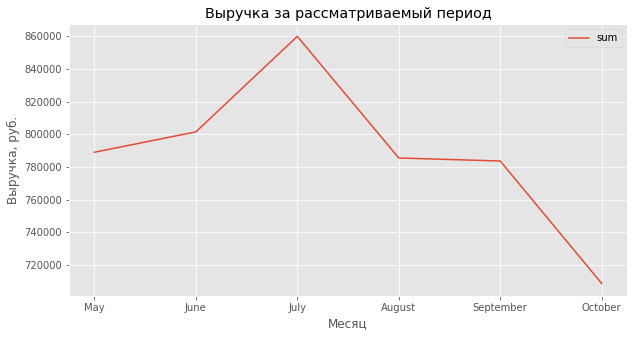

In [394]:
#2
df_sum = df.loc[df['status'] != 'ПРОСРОЧЕНО'].groupby('month').aggregate(sum)
df_sum.index = ['May', 'June', 'July', 'August', 'September', 'October']
df_sum.plot(y='sum', use_index=True, title='Выручка за рассматриваемый период', xlabel='Месяц', ylabel='Выручка, руб.')


Андреев привлек больше всего средств в сентябре 2021


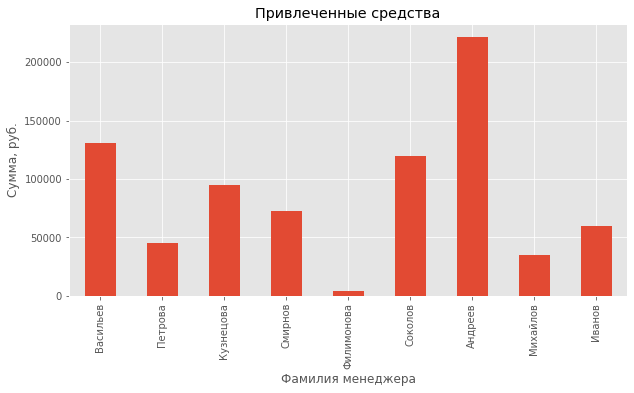

In [425]:
#3
df_sale = df.loc[(df['status'] != 'ПРОСРОЧЕНО') &
                 (df['month'] == 9)].groupby('sale').aggregate(sum)
df_sale.index = ['Васильев', 'Петрова', 'Кузнецова', 'Смирнов', 'Филимонова', 'Соколов', 'Андреев', 'Михайлов', 'Иванов']
df_sale['sum'].plot(kind='bar', title='Привлеченные средства', xlabel='Фамилия менеджера', ylabel='Сумма, руб.')
name = df_sale['sum'].idxmax()
print(name + ' привлек больше всего средств в сентябре 2021')

In [426]:
#4
if(
df.loc[(df['new/current'] == 'текущая') & 
       (df['month'] == 10)].count()['client_id'] >
df.loc[(df['new/current'] == 'новая') & 
       (df['month'] == 10)].count()['client_id']):
    print('Текущие сделки преобладали в октябре 2021')
else:
    print('Новые сделки преобладали в октябре 2021')

Текущие сделки преобладали в октябре 2021


In [427]:
#5
n = df.loc[(df['month'] == 5) & 
       (df['receiving_date'] >= '2021-6-1') & 
       (df['receiving_date'] <= '2021-6-30')].count()['client_id']
print(str(n) + ' оригиналов договора по майским сделкам было получено в июне 2021')

77 оригиналов договора по майским сделкам было получено в июне 2021


In [429]:
#6
df = df.assign(bonus =  0)
df = df.assign(remainder =  0)

def bonus(col):
    if (col['status'] == 'ОПЛАЧЕНО' and 
        col['new/current'] == 'новая' and
        col['document'] == 'оригинал' and
        col['receiving_date'].month == col['month']):
        return (col['sum'] * 0.07)
    elif (col['status'] != 'ПРОСРОЧЕНО' and 
        col['new/current'] == 'текущая' and
        col['document'] == 'оригинал' and
        col['receiving_date'].month == col['month'] and 
        col['sum'] > 10000):
        return (col['sum'] * 0.05)
    elif (col['status'] != 'ПРОСРОЧЕНО' and 
        col['new/current'] == 'текущая' and
        col['document'] == 'оригинал' and
        col['receiving_date'].month == col['month'] and 
        col['sum'] <= 10000):
        return (col['sum'] * 0.03)
    return 0

def remainder(col):
    if (col['status'] == 'ОПЛАЧЕНО' and 
        col['new/current'] == 'новая' and
        col['document'] == 'оригинал' and
        col['receiving_date'].month != col['month']):
        return (col['sum'] * 0.07)
    elif (col['status'] != 'ПРОСРОЧЕНО' and 
        col['new/current'] == 'текущая' and
        col['document'] == 'оригинал' and
        col['receiving_date'].month != col['month'] and 
        col['sum'] > 10000):
        return (col['sum'] * 0.05)
    elif (col['status'] != 'ПРОСРОЧЕНО' and 
        col['new/current'] == 'текущая' and
        col['document'] == 'оригинал' and
        col['receiving_date'].month != col['month'] and 
        col['sum'] <= 10000):
        return (col['sum'] * 0.03)
    
    

df['remainder'] = df.apply(remainder, axis = 1)
df['bonus'] = df.apply(bonus, axis = 1)

df_remainder = df.loc[(df['month'] < 7 ) & 
                      (df['receiving_date'] >= '2021-07-01')].groupby('sale').aggregate(sum)
print('Остаток каждого из менеджеров на 01.07.2021')
df_remainder['remainder']


Остаток каждого из менеджеров на 01.07.2021


sale
Андреев        3945.8297
Васильев       1037.0490
Иванов         5991.4520
Кузнецова      4496.9501
Петрова       10770.7474
Селиванов      5297.6900
Смирнов        6430.2650
Соколов         269.2110
Филимонова     2317.9579
Name: remainder, dtype: float64